In [1]:
%matplotlib inline


Robust detrending examples
==========================

Some toy examples to showcase usage for ``meegkit.detrend`` module.

Robust referencing is adapted from [1].

References
----------
> [1] de Cheveigné, A., & Arzounian, D. (2018). Robust detrending,
  rereferencing, outlier detection, and inpainting for multichannel data.
  NeuroImage, 172, 903-912.




In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

from meegkit.detrend import regress, detrend

# import config  # plotting utils

np.random.seed(9)

Regression
=============================================================================



Simple regression example, no weights
-----------------------------------------------------------------------------
We first try to fit a simple random walk process.



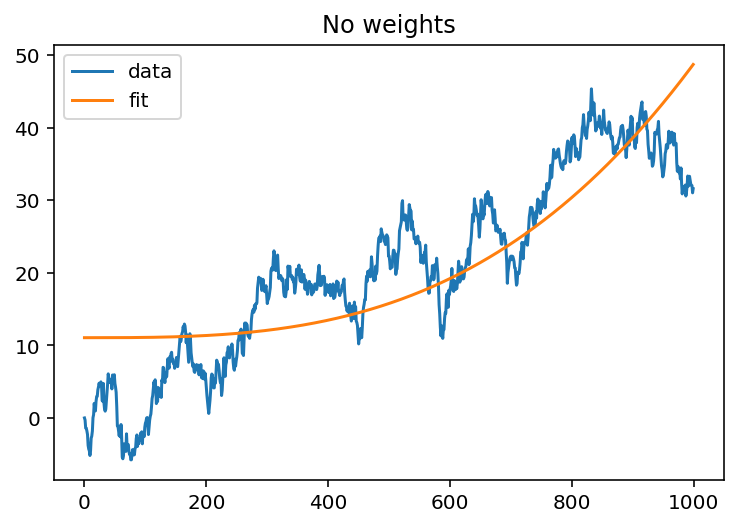

In [3]:
x = np.cumsum(np.random.randn(1000, 1), axis=0)
r = np.arange(1000.)[:, None]
r = np.hstack([r, r ** 2, r ** 3])
b, y = regress(x, r)

plt.figure(1)
plt.plot(x, label='data')
plt.plot(y, label='fit')
plt.title('No weights')
plt.legend()
plt.show()

Downweight 1st half of the data
-----------------------------------------------------------------------------
We can also use weights for each time sample. Here we explicitly restrict the
fit to the second half of the data by setting weights to zero for the first
500 samples.



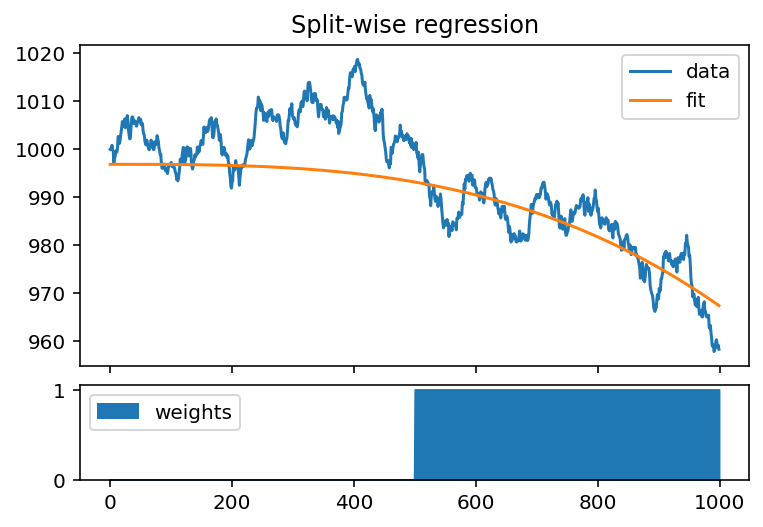

In [4]:
x = np.cumsum(np.random.randn(1000, 1), axis=0) + 1000
w = np.ones(y.shape[0])
w[:500] = 0
b, y = regress(x, r, w)

f = plt.figure(3)
gs = GridSpec(4, 1, figure=f)
ax1 = f.add_subplot(gs[:3, 0])
ax1.plot(x, label='data')
ax1.plot(y, label='fit')
ax1.set_xticklabels('')
ax1.set_title('Split-wise regression')
ax1.legend()
ax2 = f.add_subplot(gs[3, 0])
l, = ax2.plot(np.arange(1000), np.zeros(1000))
ax2.stackplot(np.arange(1000), w, labels=['weights'], color=l.get_color())
ax2.legend(loc=2)

Multichannel regression
-----------------------------------------------------------------------------



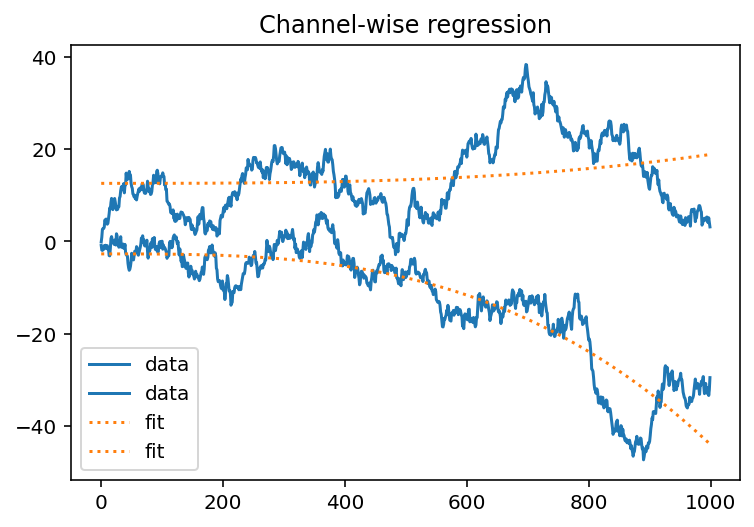

In [5]:
x = np.cumsum(np.random.randn(1000, 2), axis=0)
w = np.ones(y.shape[0])
b, y = regress(x, r, w)

plt.figure(4)
plt.plot(x, label='data', color='C0')
plt.plot(y, ls=':', label='fit', color='C1')
plt.title('Channel-wise regression')
plt.legend()

Detrending
=============================================================================



Basic example with a linear trend
-----------------------------------------------------------------------------



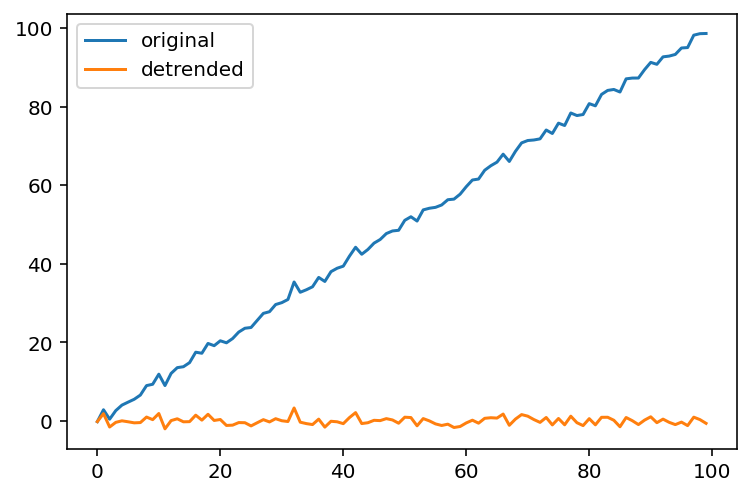

In [6]:
x = np.arange(100)[:, None]
x = x + np.random.randn(*x.shape)
y, _, _ = detrend(x, 1)

plt.figure(5)
plt.plot(x, label='original')
plt.plot(y, label='detrended')
plt.legend()

Detrend biased random walk with a third-order polynomial
-----------------------------------------------------------------------------



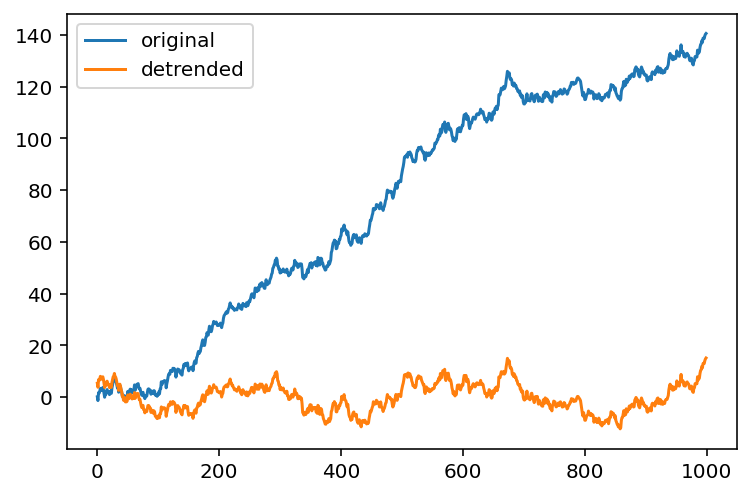

In [7]:
x = np.cumsum(np.random.randn(1000, 1) + 0.1)
y, _, _ = detrend(x, 3)

plt.figure(6)
plt.plot(x, label='original')
plt.plot(y, label='detrended')
plt.legend()

Detrend with weights
-----------------------------------------------------------------------------
Finally, we show how the detrending process handles local artifacts, and how
we can advantageously use weights to improve detrending. The raw data
consists of gaussian noise with a linear trend, and a storng glitch covering
the first 100 timesamples (blue trace). Detrending without weights (orange
trace) causes an overestimation of the polynomial order because of the
glitch, leading to a mediocre fit. When downweightining this artifactual
period, the fit is much improved (green trace).



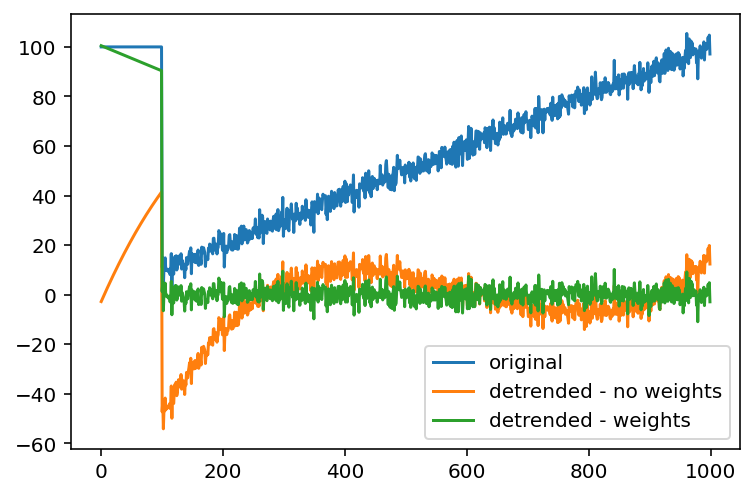

In [8]:
x = np.linspace(0, 100, 1000)[:, None]
x = x + 3 * np.random.randn(*x.shape)

# introduce some strong artifact on the first 100 samples
x[:100, :] = 100

# Detrend
y, _, _ = detrend(x, 3, None, threshold=np.inf)

# Same process but this time downweight artifactual window
w = np.ones(x.shape)
w[:100, :] = 0
z, _, _ = detrend(x, 3, w)

plt.figure(7)
plt.plot(x, label='original')
plt.plot(y, label='detrended - no weights')
plt.plot(z, label='detrended - weights')
plt.legend()
plt.show()